In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of molecules
molecules = ["O2", "N2", "H2"]

# Load datasets into one DataFrame with a new 'molecule' column
df_list = []
for mol in molecules:
    filename = f"collision_dataset_10000_{mol}.csv"
    df_temp = pd.read_csv(filename)
    df_temp["molecule"] = mol
    df_list.append(df_temp)

df_all = pd.concat(df_list, ignore_index=True)

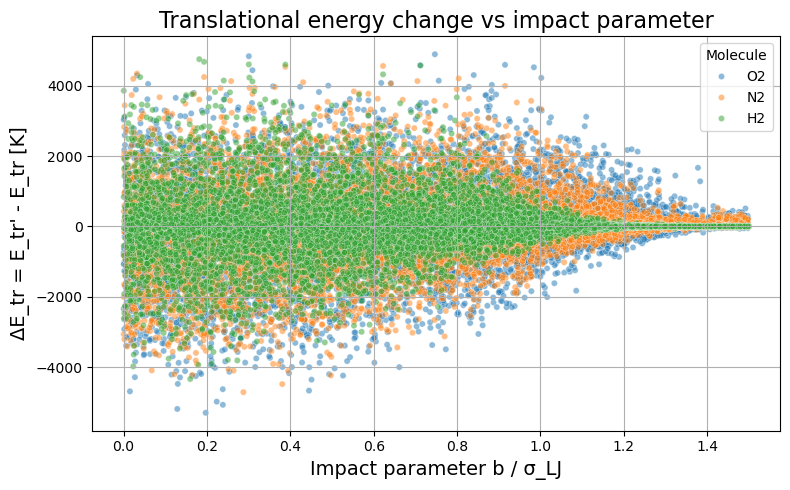

In [5]:
# ΔE_tr = Etr' - Etr
df_all["dEtr"] = df_all["Etrp"] - df_all["Etr"]

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_all, x="b", y="dEtr", hue="molecule", alpha=0.5, s=20)
plt.xlabel("Impact parameter b / σ_LJ", fontsize=14)
plt.ylabel("ΔE_tr = E_tr' - E_tr [K]", fontsize=14)
plt.title("Translational energy change vs impact parameter", fontsize=16)
plt.legend(title="Molecule")
plt.grid(True)
plt.tight_layout()
plt.show()

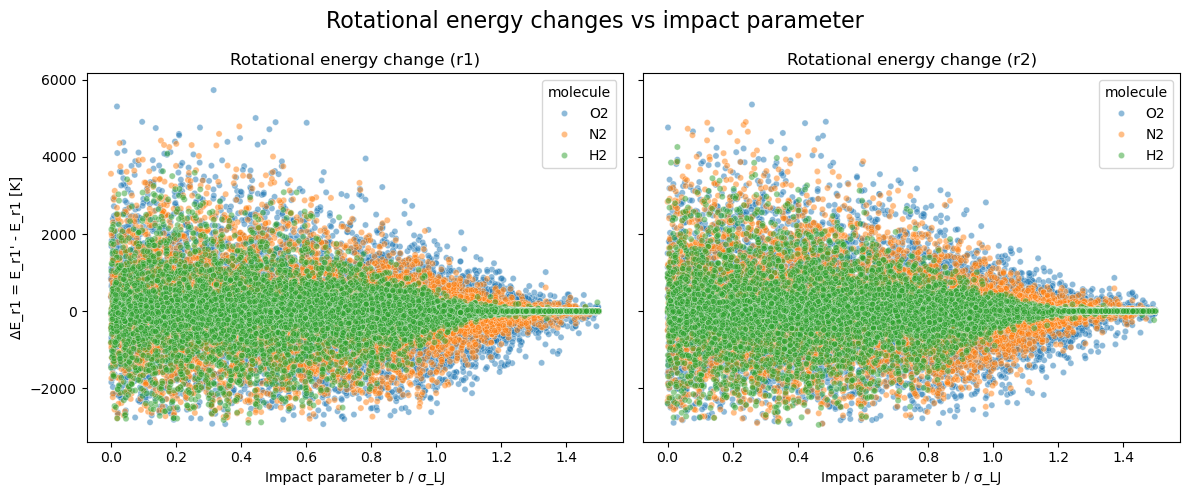

In [6]:
# ΔE_r1 and ΔE_r2
df_all["dEr1"] = df_all["Er1p"] - df_all["Er1"]
df_all["dEr2"] = df_all["Er2p"] - df_all["Er2"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

sns.scatterplot(data=df_all, x="b", y="dEr1", hue="molecule", alpha=0.5, s=20, ax=axes[0])
axes[0].set_title("Rotational energy change (r1)")
axes[0].set_xlabel("Impact parameter b / σ_LJ")
axes[0].set_ylabel("ΔE_r1 = E_r1' - E_r1 [K]")

sns.scatterplot(data=df_all, x="b", y="dEr2", hue="molecule", alpha=0.5, s=20, ax=axes[1])
axes[1].set_title("Rotational energy change (r2)")
axes[1].set_xlabel("Impact parameter b / σ_LJ")
axes[1].set_ylabel("ΔE_r2 = E_r2' - E_r2 [K]")

plt.suptitle("Rotational energy changes vs impact parameter", fontsize=16)
plt.tight_layout()
plt.show()

In [9]:
def plot_pre_vs_post(df, pre_col, post_col, title, xlabel, ylabel):
    plt.figure(figsize=(6,6))
    sns.scatterplot(data=df, x=pre_col, y=post_col, hue="molecule", alpha=0.5, s=20)
    max_val = max(df[pre_col].max(), df[post_col].max())
    plt.plot([0, max_val], [0, max_val], 'k--', lw=1)  # identity line
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend(title="Molecule")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

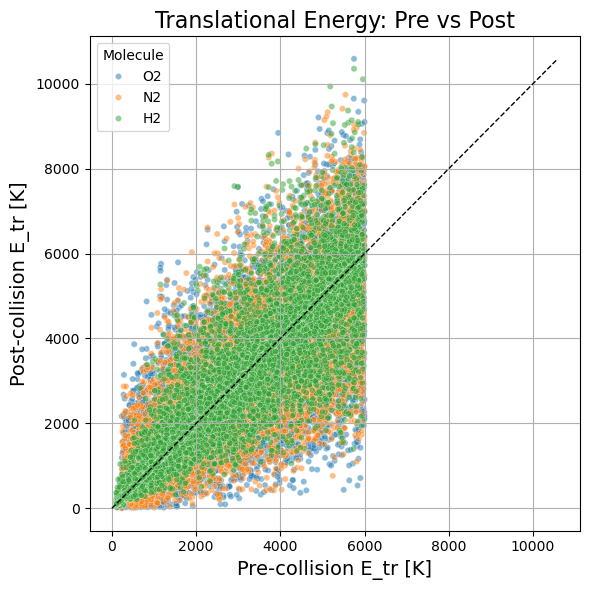

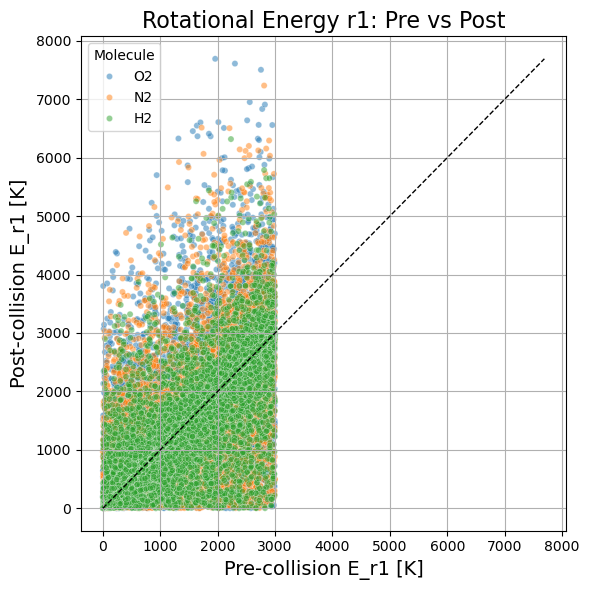

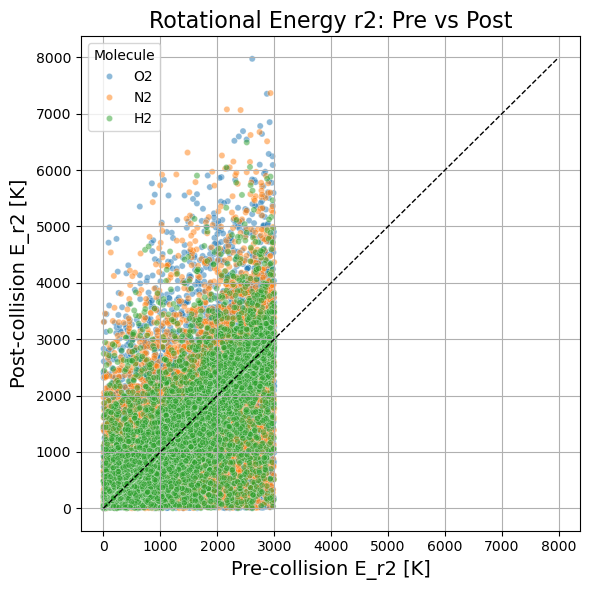

In [10]:
# Translational energy
plot_pre_vs_post(df_all, "Etr", "Etrp", 
                 "Translational Energy: Pre vs Post", 
                 "Pre-collision E_tr [K]", "Post-collision E_tr [K]")

# Rotational energy r1
plot_pre_vs_post(df_all, "Er1", "Er1p", 
                 "Rotational Energy r1: Pre vs Post", 
                 "Pre-collision E_r1 [K]", "Post-collision E_r1 [K]")

# Rotational energy r2
plot_pre_vs_post(df_all, "Er2", "Er2p", 
                 "Rotational Energy r2: Pre vs Post", 
                 "Pre-collision E_r2 [K]", "Post-collision E_r2 [K]")

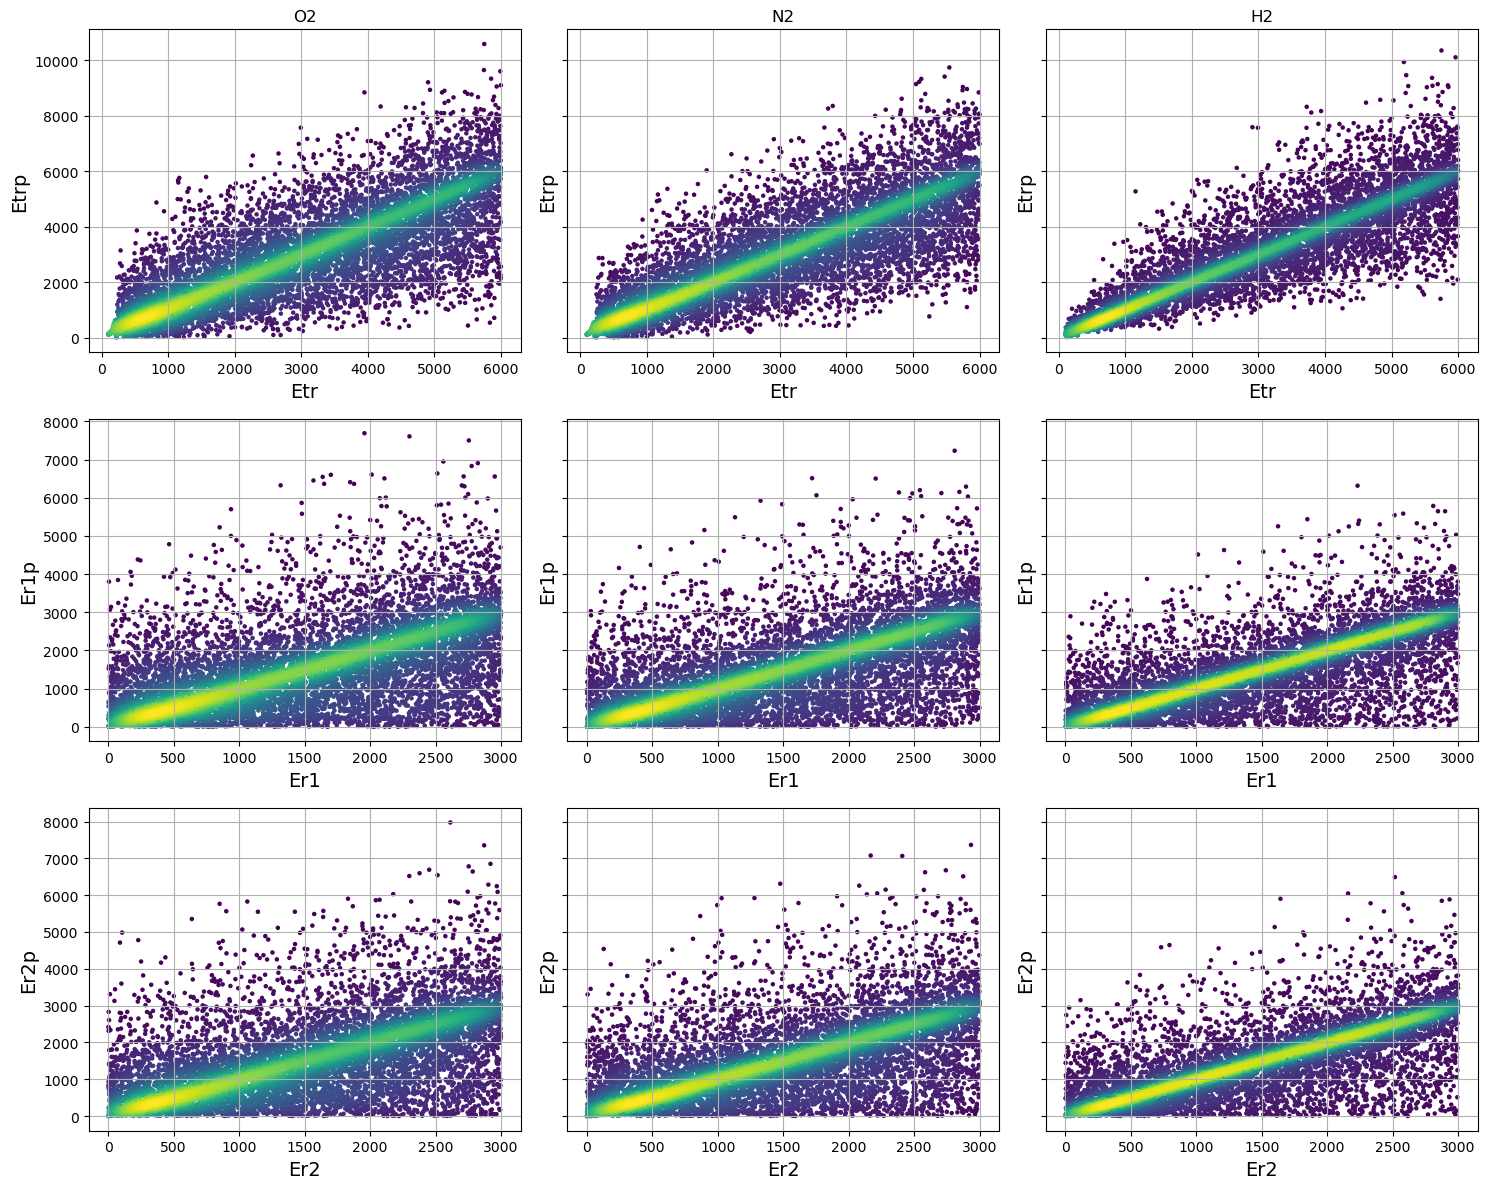

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


# Energy column pairs
energy_pairs = [("Etr", "Etrp"), ("Er1", "Er1p"), ("Er2", "Er2p")]

# Density scatter helper
def dscatter(ax, x, y):
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    sc = ax.scatter(x, y, c=z, s=5, cmap="viridis")
    return sc

# Create 3x3 subplot grid
fig, axes = plt.subplots(len(molecules), len(energy_pairs), figsize=(15, 12), sharey='row')

for i, mol in enumerate(molecules):
    df_mol = df_all[df_all["molecule"] == mol]
    for j, (pre_col, post_col) in enumerate(energy_pairs):
        ax = axes[j, i]
        x = df_mol[pre_col].values
        y = df_mol[post_col].values

        # Density-colored scatter
        dscatter(ax, x, y)
        
        ax.set_ylabel(f"{post_col}", fontsize=14)
        ax.set_xlabel(f"{pre_col}", fontsize=14)
        if j == 0:
            ax.set_title(f"{mol}", fontsize=12)

        ax.grid(True)

plt.tight_layout()
plt.show()